# Funnel Analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import textwrap
import sys

In [2]:
import jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme= 'monokai', context = 'notebook', ticks = True, grid = True)
%matplotlib inline

In [3]:
user = pd.read_csv('user_table.csv')

In [4]:
home = pd.read_csv('home_page_table.csv')

In [5]:
search = pd.read_csv('search_page_table.csv')

In [6]:
payment = pd.read_csv('payment_page_table.csv')

In [7]:
confirm = pd.read_csv('payment_confirmation_table.csv')

In [8]:
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [9]:
home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [10]:
search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [11]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   date     90400 non-null  object
 2   device   90400 non-null  object
 3   sex      90400 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [12]:
payment.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [13]:
confirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [14]:
user.shape

(90400, 4)

In [15]:
home.shape

(90400, 2)

In [16]:
data_frames = [user, home, search, payment, confirm]

In [17]:
from functools import reduce

In [18]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                            how='outer'), data_frames)

In [19]:
df_merged.head()

,user_id,date,device,sex,page_x,page_y,page_x,page_y
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [20]:
df_merged.rename({'page_x':'home_page','page_y':'search_page', 'page_x':'payment_page', 'page_y':'confirm_page'}, axis = 1, inplace= True)

In [21]:
df_merged.head()

,user_id,date,device,sex,payment_page,confirm_page,payment_page,confirm_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [22]:
df_merged.shape

(90400, 8)

In [23]:
homep = user.merge(home, how = 'inner', on = ['user_id'])

In [24]:
searchp = user.merge(search, how = 'inner', on = ['user_id'])

In [25]:
payp = user.merge(payment, how = 'inner', on = ['user_id'])

In [26]:
confirmp = user.merge(confirm, how = 'inner', on = ['user_id'])

In [27]:
df = pd.concat([homep,searchp,payp,confirmp])

In [28]:
df.head()

,user_id,date,device,sex,page
0,450007,2015-02-28,Desktop,Female,home_page
1,756838,2015-01-13,Desktop,Male,home_page
2,568983,2015-04-09,Desktop,Male,home_page
3,190794,2015-02-18,Desktop,Female,home_page
4,537909,2015-01-15,Desktop,Male,home_page


In [29]:
df.shape

(142082, 5)

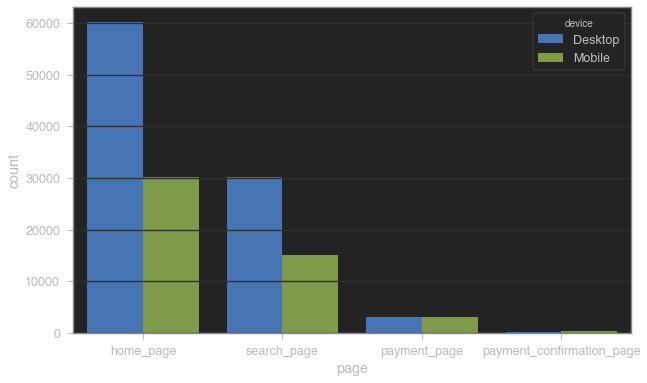

In [30]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'page', hue = 'device', data = df) 

In [31]:
pages = ['home_page', 'search_page', 'payment_page','payment_confirmation_page']

In [32]:
print('Conversion Rate')
print('-' * 20)
for i in range(3):
    print(pages[i+1])
    print(sum(df['page'] == pages[i+1])/sum(df['page'] == pages[i]))

Conversion Rate
--------------------
search_page
0.5
payment_page
0.1334070796460177
payment_confirmation_page
0.07495854063018242


In [33]:
print('Conversion Rate for Desktop')
df_desk = df[df['device'] == 'Desktop']
print('-' * 65)
for i in range(3):
    print(pages[i+1])
    print(sum(df_desk['page'] == pages[i+1])/sum(df_desk['page'] == pages[i]))

Conversion Rate for Desktop
-----------------------------------------------------------------
search_page
0.5
payment_page
0.1
payment_confirmation_page
0.04983388704318937


In [34]:
print('Conversion Rate for Mobile')
df_mob = df[df['device'] == 'Mobile']
print('-' * 65)
for i in range(3):
    print(pages[i+1])
    print(sum(df_mob['page'] == pages[i+1])/sum(df_mob['page'] == pages[i]))

Conversion Rate for Mobile
-----------------------------------------------------------------
search_page
0.5
payment_page
0.2
payment_confirmation_page
0.1


payment and payment confirmation conversion rate of mobile are twice as much as those of desktop.

### Now let's explore gender as a factor 

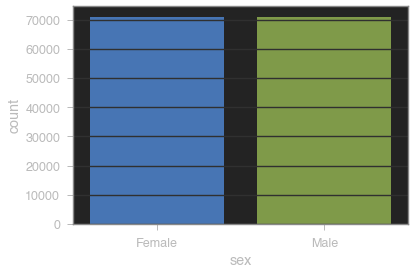

In [35]:
sns.countplot(df['sex'])

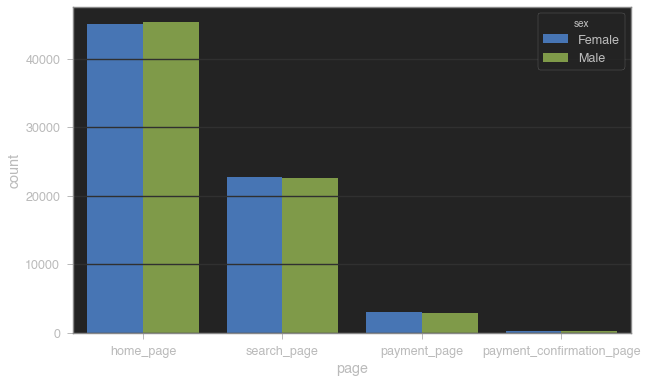

In [36]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'page', hue = 'sex', data = df) 

We can see that sex is not a factor that affects conversion rate along the funnel

### Now let's explore time as a factor 

In [37]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [38]:
df.head()

,user_id,date,device,sex,page,month
0,450007,2015-02-28,Desktop,Female,home_page,2
1,756838,2015-01-13,Desktop,Male,home_page,1
2,568983,2015-04-09,Desktop,Male,home_page,4
3,190794,2015-02-18,Desktop,Female,home_page,2
4,537909,2015-01-15,Desktop,Male,home_page,1


Text(0.5, 1.0, 'Count of Page Landings by Month Overall')

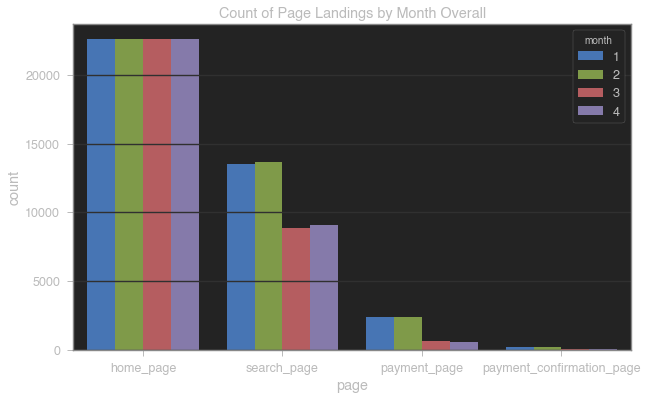

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'page', hue = 'month', data = df) 
plt.title('Count of Page Landings by Month Overall')

In [43]:
Month = [1, 2, 3, 4]

In [45]:
df_desk = df[df['device'] == 'Desktop']
df_mob = df[df['device'] == 'Mobile']

Text(0.5, 1.0, 'Count of Page Landings by Month for Desktop')

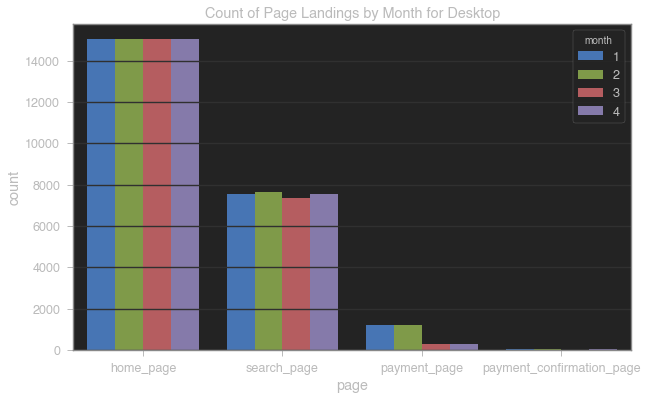

In [46]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'page', hue = 'month', data = df_desk) 
plt.title('Count of Page Landings by Month for Desktop')

Text(0.5, 1.0, 'Count of Page Landings by Month for Mobile')

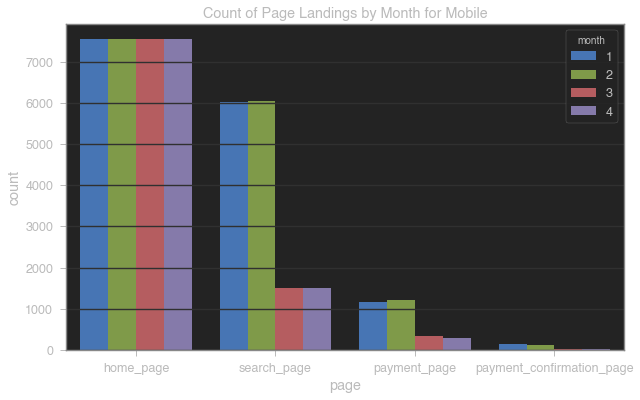

In [47]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'page', hue = 'month', data = df_mob) 
plt.title('Count of Page Landings by Month for Mobile')

/Users/henryxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


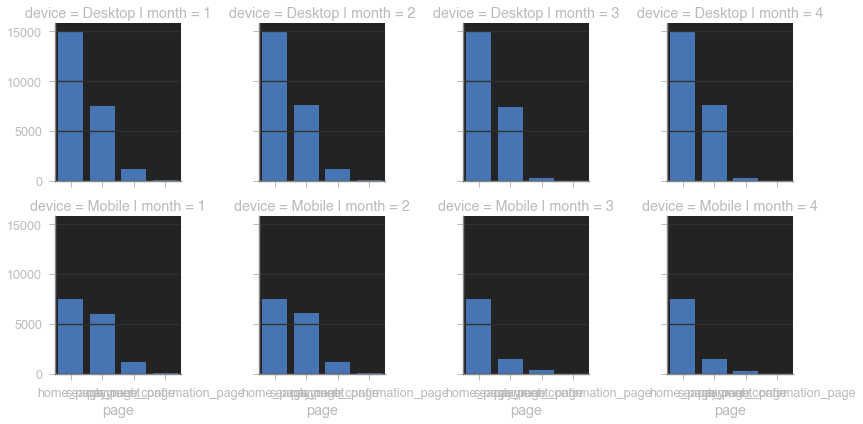

In [48]:
gg = sns.FacetGrid(data = df, col = 'month', row = 'device')
gg.map(sns.countplot, 'page') #needs only one argument

In [49]:
print('Conversion Rate')
print('-' * 20)
for i in range(3):
    print(pages[i+1])
    print(sum(df['page'] == pages[i+1])/sum(df['page'] == pages[i]))

Conversion Rate
--------------------
search_page
0.5
payment_page
0.1334070796460177
payment_confirmation_page
0.07495854063018242


In [50]:
print('{:<10} {:<10} {:>20}'.format('Month', 'Page', 'Overall Conversion Rate'))
print('-' * 65)

for i in range(3):
    p = pages[i+1]
    
    for j in range(4):
        m = Month[j]
        df_j = df[df['month'] == m]
        crate = sum(df_j['page'] == pages[i+1])/sum(df_j['page'] == pages[i])
        
        print('{:<10} {:<10} {:>10f}'.format(m, p, crate))

Month      Page       Overall Conversion Rate
-----------------------------------------------------------------
1          search_page   0.599735
2          search_page   0.605619
3          search_page   0.392876
4          search_page   0.401770
1          payment_page   0.176332
2          payment_page   0.176226
3          payment_page   0.071067
4          payment_page   0.065749
1          payment_confirmation_page   0.079079
2          payment_confirmation_page   0.071725
3          payment_confirmation_page   0.069731
4          payment_confirmation_page   0.077052


In [62]:
#Conversion Rate Against home_page for Desktop
print('{:<10} {:<30} {:<10}'.format('Month', 'Page', 'Conversion Rate Against Home Page for Desktop'))
print('-' * 65)

for p in pages[1:]:
    
    for j in range(4):
        m = Month[j]
        df_j = df_desk[df_desk['month'] == m]
        crate = sum(df_j['page'] == p) / sum(df_j['page'] == 'home_page')
    
        print('{:<10} {:<30} {:10f}'.format(m, p, crate))
    

Month      Page                           Conversion Rate Against Home Page for Desktop
-----------------------------------------------------------------
1          search_page                      0.500266
2          search_page                      0.507110
3          search_page                      0.489701
4          search_page                      0.502924
1          payment_page                     0.081130
2          payment_page                     0.079136
3          payment_page                     0.019668
4          payment_page                     0.020066
1          payment_confirmation_page        0.003987
2          payment_confirmation_page        0.003588
3          payment_confirmation_page        0.000930
4          payment_confirmation_page        0.001462


In [51]:
print('{:<10} {:<30} {:<10}'.format('Month', 'Page', 'Conversion Rate for Desktop'))
print('-' * 65)


for i in range(3):
    p = pages[i+1]
    
    for j in range(4):
        m = Month[j]
        df_j = df_desk[df_desk['month'] == m]
        crate = sum(df_j['page'] == pages[i+1])/sum(df_j['page'] == pages[i])
        
        print('{:<10} {:<30} {:10f}'.format(m, p, crate))

Month      Page                           Conversion Rate for Desktop
-----------------------------------------------------------------
1          search_page                      0.500266
2          search_page                      0.507110
3          search_page                      0.489701
4          search_page                      0.502924
1          payment_page                     0.162173
2          payment_page                     0.156053
3          payment_page                     0.040163
4          payment_page                     0.039900
1          payment_confirmation_page        0.049140
2          payment_confirmation_page        0.045340
3          payment_confirmation_page        0.047297
4          payment_confirmation_page        0.072848


In [66]:
print('{:<10} {:<30} {:<10}'.format('Month', 'Page', 'Conversion Rate Against Home Page for Mobile'))
print('-' * 65)

for p in pages[1:]:
    
    for j in range(4):
        m = Month[j]
        df_j = df_mob[df_mob['month'] == m]
        crate = sum(df_j['page'] == p) / sum(df_j['page'] == 'home_page')
    
        print('{:<10} {:<30} {:10f}'.format(m, p, crate))

Month      Page                           Conversion Rate Against Home Page for Mobile
-----------------------------------------------------------------
1          search_page                      0.798013
2          search_page                      0.801987
3          search_page                      0.199868
4          search_page                      0.200132
1          payment_page                     0.154834
2          payment_page                     0.161722
3          payment_page                     0.044371
4          payment_page                     0.039073
1          payment_confirmation_page        0.017086
2          payment_confirmation_page        0.015762
3          payment_confirmation_page        0.003974
4          payment_confirmation_page        0.003179


In [52]:
print('{:<10} {:<30} {:<20}'.format('Month', 'Page', 'Conversion Rate for Mobile'))
print('-' * 65)


for i in range(3):
    p = pages[i+1]
    
    for j in range(4):
        m = Month[j]
        df_j = df_mob[df_mob['month'] == m]
        crate = sum(df_j['page'] == pages[i+1])/sum(df_j['page'] == pages[i])
        
        print('{:<10} {:30} {:10f}'.format(m, p, crate))

Month      Page                           Conversion Rate for Mobile
-----------------------------------------------------------------
1          search_page                      0.798013
2          search_page                      0.801987
3          search_page                      0.199868
4          search_page                      0.200132
1          payment_page                     0.194025
2          payment_page                     0.201652
3          payment_page                     0.222001
4          payment_page                     0.195235
1          payment_confirmation_page        0.110351
2          payment_confirmation_page        0.097461
3          payment_confirmation_page        0.089552
4          payment_confirmation_page        0.081356


From the analysis on month we can see that: 

for mobile:
* search_page conversion rate dropped significantly, almost four_fold, in March and April
* payment_page and payment_confirmation_page conversion rate stayed relatively consistent throughout

for desktop:
* payment_page conversion rate dropped significantly, more than three_fold, in March and April
* payment_confirmation_page conversion rate almost doubled in April
* search_page conversion rate stayed relatively consistent throughout

We may want to look into why the conversion rate changed in March and April

### Now let's explore day of week

In [53]:
df['day'] = pd.DatetimeIndex(df['date']).dayofweek

In [54]:
df.head()

,user_id,date,device,sex,page,month,day
0,450007,2015-02-28,Desktop,Female,home_page,2,5
1,756838,2015-01-13,Desktop,Male,home_page,1,1
2,568983,2015-04-09,Desktop,Male,home_page,4,3
3,190794,2015-02-18,Desktop,Female,home_page,2,2
4,537909,2015-01-15,Desktop,Male,home_page,1,3


Text(0.5, 1.0, 'Count of Page Landings by Month for Overall')

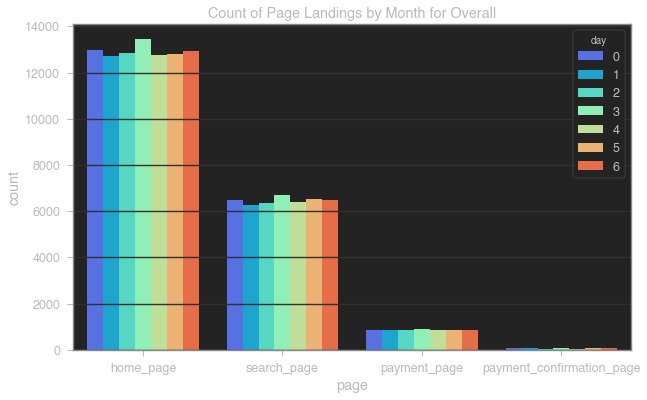

In [55]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'page', hue = 'day', data = df, palette = 'rainbow') 
plt.title('Count of Page Landings by Month for Overall')

In [56]:
df_desk = df[df['device'] == 'Desktop']
df_mob = df[df['device'] == 'Mobile']


Text(0.5, 1.0, 'Count of Page Landings by Month for Desktop')

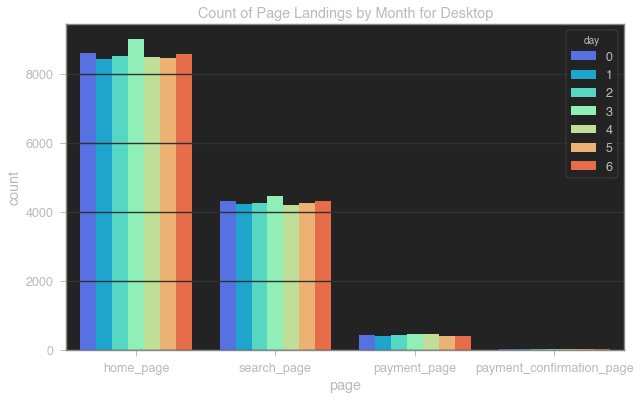

In [57]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'page', hue = 'day', data = df_desk, palette = 'rainbow') 
plt.title('Count of Page Landings by Month for Desktop')

Text(0.5, 1.0, 'Count of Page Landings by Month for Mobile')

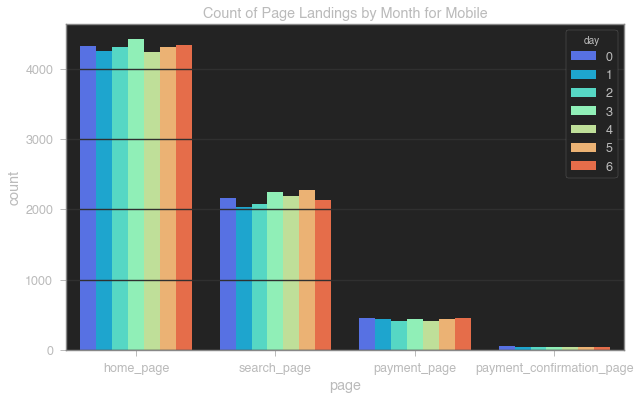

In [58]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'page', hue = 'day', data = df_mob, palette = 'rainbow') 
plt.title('Count of Page Landings by Month for Mobile')

We can clearly see that day of week is not a factor that affects conversion rate along the funnel